# Setup

In [43]:
!pip install pandas
!pip install -U scikit-learn
!pip install tqdm
!pip install seaborn

8143.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


8149.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


8156.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


8163.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [44]:
!pip install IPython

8183.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [45]:
import torch as torch
import math

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [47]:
torch.manual_seed(0)

In [48]:
my_map = matplotlib.colors.LinearSegmentedColormap.from_list('', ['red', 'yellow', 'green'])

# Generate Dataset

In [49]:
data, labels = make_blobs(n_samples=2000, n_features=2, centers=4, random_state=10)
print(data.shape, labels.shape)

(2000, 2) (2000,)


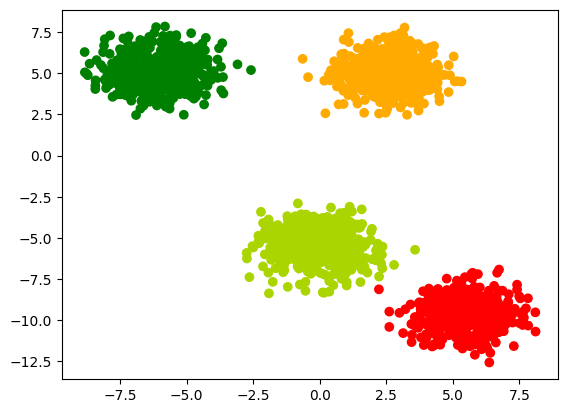

In [50]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_map)
plt.show()

In [51]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=10)
print(X_train.shape, Y_val.shape)

(1500, 2) (500,)


In [52]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))
print(X_train.shape, Y_train.shape)

torch.Size([1500, 2]) torch.Size([1500])


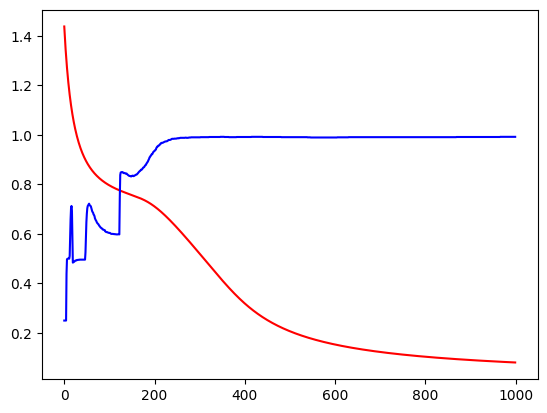

Loss before training 1.4376835823059082
Loss after training 0.08069375902414322


In [53]:
torch.manual_seed(0)
def model(x):
    a1 = torch.matmul(x, weights1) + bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, weights2) + bias2
    h2 = a2.exp() / a2.exp().sum(-1).unsqueeze(-1)
    return h2

def loss_fn(y_hat, y):
    return -y_hat[range(y_hat.shape[0]), y].log().mean()

def accuracy(y_hat, y):
    pred = torch.argmax(y_hat, dim=1)
    return (pred == y).float().mean()

weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 1000

X_train = X_train.float() 
Y_train = Y_train.long() 

loss_arr = []
acc_arr = []


for epoch in range(epochs):
    y_hat = model(X_train)
    loss = loss_fn(y_hat, Y_train)
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train).item())

    with torch.no_grad():

        weights1 -= learning_rate * weights1.grad
        bias1    -= learning_rate * bias1.grad
        weights2 -= learning_rate * weights2.grad
        bias2    -= learning_rate * bias2.grad

        weights1.grad.zero_()
        bias1.grad.zero_()
        weights2.grad.zero_()
        bias2.grad.zero_()

plt.plot(loss_arr, 'r')
plt.plot(acc_arr, 'b')
plt.show()

print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

# Using NN.Functional

In [54]:
import torch.nn.functional as F

100%|██████████| 10000/10000 [00:05<00:00, 1923.66epoch/s]


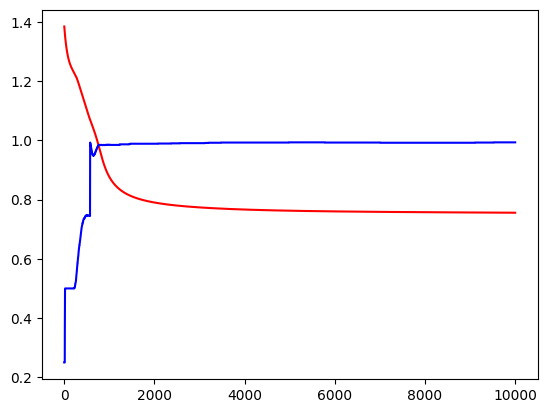

Loss before training 1.3846471309661865
Loss after training 0.7557096481323242


In [55]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for i in tqdm(range(epochs), total = epochs, unit = 'epoch'):
    y_hat = model(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    with torch.no_grad():
        weights1 -= weights1.grad * learning_rate
        bias1    -= bias1.grad * learning_rate
        weights2 -= weights2.grad * learning_rate
        bias2    -= bias2.grad * learning_rate

        weights1.grad.zero_()
        bias1.grad.zero_()
        weights2.grad.zero_()
        bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])


# Using NN.Paramater

In [56]:
import torch.nn as nn

100%|██████████| 1000/1000 [00:00<00:00, 1579.48epoch/s]


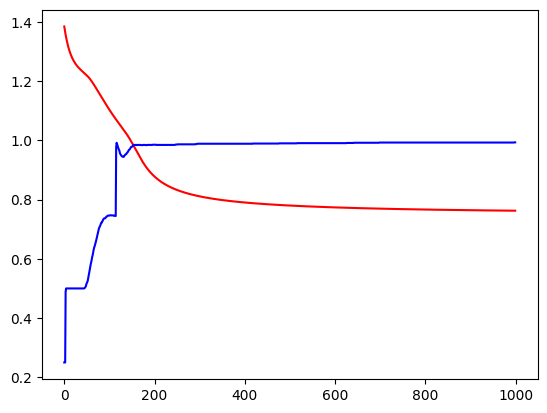

Loss before training 1.3846471309661865
Loss after training 0.7625219821929932


In [58]:
class FirstNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.weights1 = nn.Parameter(torch.randn(2,2)/math.sqrt(2))
        self.bias1    = nn.Parameter(torch.zeros(1, 2))
        self.weights2 = nn.Parameter(torch.randn(2, 4)/math.sqrt(2))
        self.bias2    = nn.Parameter(torch.zeros(1, 4))

    def forward(self, X):
        a1 = torch.matmul(X, self.weights1) + self.bias1
        h1 = a1.sigmoid()
        a2 = torch.matmul(h1, self.weights2) + self.bias2
        h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
        return h2
    
def fit(epochs = 1000, learning_rate = 1):
    loss_arr = []
    acc_arr  = []

    for epoch in tqdm(range(epochs), total = epochs, unit='epoch'):
        y_hat = fn(X_train)
        loss = F.cross_entropy(y_hat, Y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))

        loss.backward()
        with torch.no_grad():
            for param in fn.parameters():
                param -= learning_rate * param.grad
            fn.zero_grad()
    plt.plot(loss_arr, 'r-')
    plt.plot(acc_arr, 'b-')
    plt.show()      
    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])

fn = FirstNetwork()
fit()


# Using NN.Linear and Optim

In [61]:
from torch import optim

100%|██████████| 10000/10000 [00:07<00:00, 1334.42epoch/s]


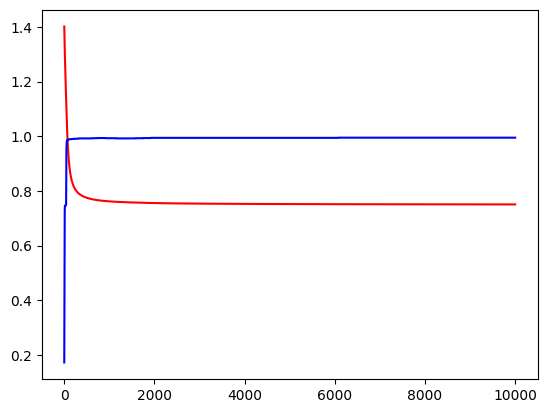

Loss before training 1.4015765190124512
Loss after training 0.7504169940948486


In [63]:
class FirstNetwork_v1(nn.Module):

    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.lin1 = nn.Linear(2, 2)
        self.lin2 = nn.Linear(2, 4)

    def forward(self, X):
        a1 = self.lin1(X)
        h1 = a1.sigmoid()
        a2 = self.lin2(h1)
        h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
        return h2

def fit_v1(epcohs = 1000, learning_rate = 1):
    loss_arr = []
    acc_arr = []
    opt = optim.SGD(fn.parameters(), lr = learning_rate)

    for epoch in tqdm(range(epochs), total=epochs, unit = 'epoch'):
        y_hat = fn(X_train)
        loss = F.cross_entropy(y_hat, Y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))

        loss.backward()
        opt.step()
        opt.zero_grad()
    
    plt.plot(loss_arr, 'r-')
    plt.plot(acc_arr, 'b-')
    plt.show()

    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])
fn = FirstNetwork_v1()
fit_v1()

# Using NN.Sequential

In [65]:
class FirstNetork_v2(nn.Module):

    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 4),
            nn.Softmax()
        )
    
    def forward(self, X):
        return self.net(X)
    
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):

    for each in tqdm(range(epochs), total = epochs, unit ='epoch'):
        loss = loss_fn(model(x), y)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item()

fn = FirstNetork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

100%|██████████| 1000/1000 [00:00<00:00, 1715.98epoch/s]


0.7615659832954407

# Running it on GPU

In [69]:
device = torch.device('cuda')

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetork_v2()
fn.to(device)
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn, epochs = 100000))

  0%|          | 0/100000 [00:00<?, ?epoch/s]

100%|██████████| 100000/100000 [01:12<00:00, 1375.49epoch/s]

Final loss 1.4015766382217407


In [71]:
class FirstNetwork_v3(nn.Module):

    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
            nn.Linear(2, 2024*4),
            nn.Sigmoid(),
            nn.Linear(1024*4, 4),
            nn.Softmax()
        )
    
    def forward(self, X):
        return self.net(x)
    
device = torch.device('cuda')

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetork_v2()
fn.to(device)
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn, epochs = 100))

  0%|          | 0/100 [00:00<?, ?epoch/s]

100%|██████████| 100/100 [00:00<00:00, 1405.96epoch/s]

Final loss 1.4015766382217407


# With different hyperparameters

  0%|          | 0/1000 [00:00<?, ?epoch/s]

100%|██████████| 1000/1000 [00:01<00:00, 757.28epoch/s]


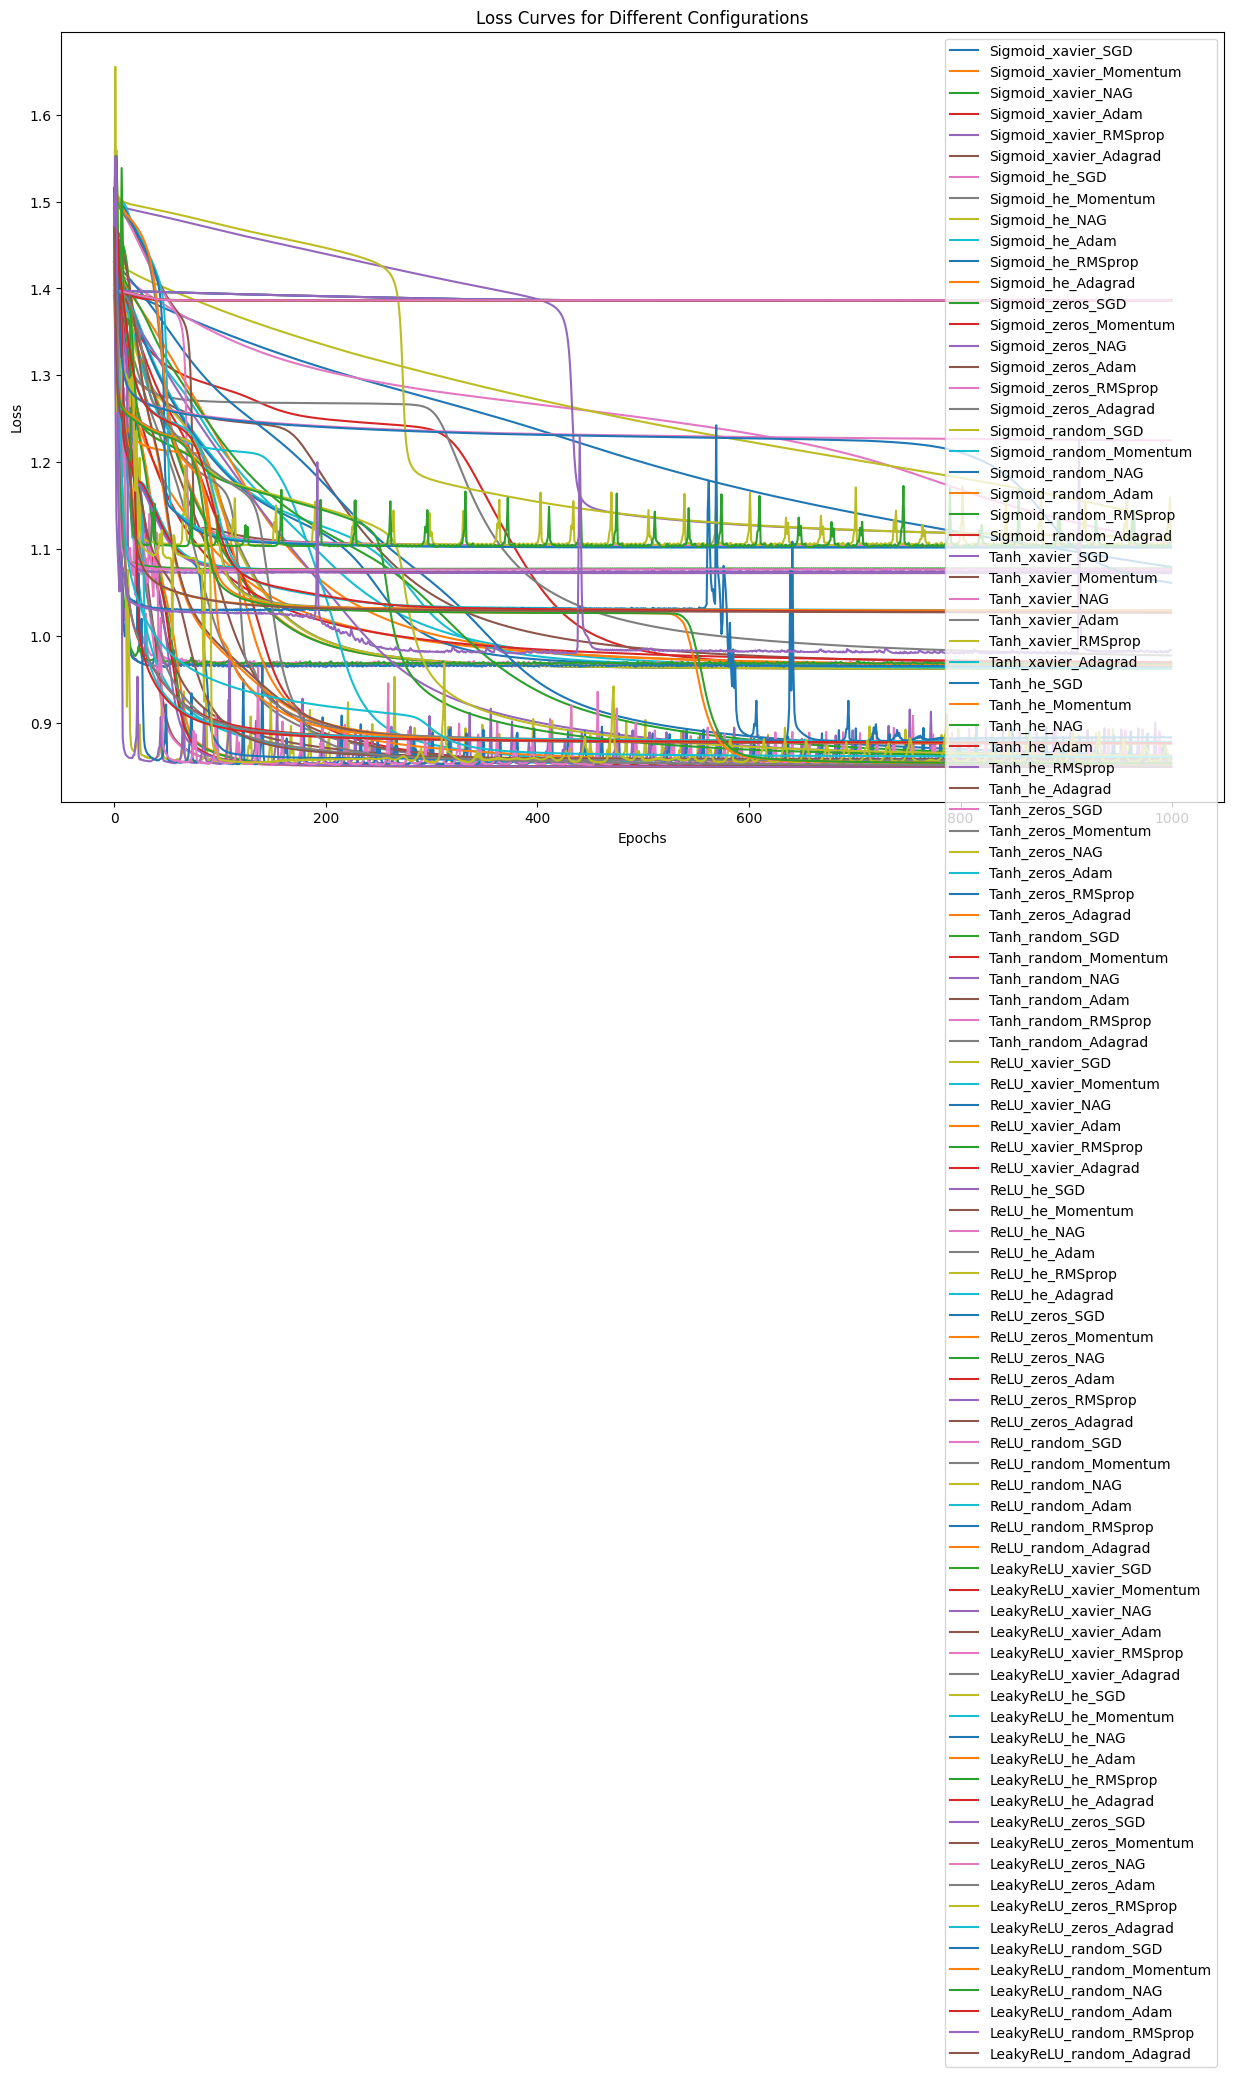

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the neural network with configurable activation and initialization
class FirstNetwork_v2(nn.Module):
    def __init__(self, activation_fn=nn.Sigmoid(), init_method='xavier'):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
            nn.Linear(2, 2),
            activation_fn,
            nn.Linear(2, 4),
            nn.Softmax(dim=1)
        )
        self.init_weights(init_method)
    
    def forward(self, X):
        return self.net(X)
    
    def init_weights(self, method):
        for m in self.net:
            if isinstance(m, nn.Linear):
                if method == 'xavier':
                    nn.init.xavier_uniform_(m.weight)
                elif method == 'he':
                    nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                elif method == 'zeros':
                    nn.init.zeros_(m.weight)
                elif method == 'random':
                    nn.init.uniform_(m.weight)

# Training function
def fit_v2(x, y, model, opt, loss_fn, epochs=1000, reg=None, reg_lambda=0.01):
    loss_arr = []
    for each in tqdm(range(epochs), total=epochs, unit='epoch'):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        
        if reg == 'l2':
            l2_reg = torch.tensor(0.).to(device)
            for param in model.parameters():
                l2_reg += torch.norm(param)
            loss += reg_lambda * l2_reg
        elif reg == 'l1':
            l1_reg = torch.tensor(0.).to(device)
            for param in model.parameters():
                l1_reg += torch.sum(torch.abs(param))
            loss += reg_lambda * l1_reg

        loss.backward()
        opt.step()
        opt.zero_grad()
        loss_arr.append(loss.item())
    return loss_arr

# Initialize the dataset
data, labels = make_blobs(n_samples=2000, n_features=2, centers=4, random_state=10)
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=10)
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))
X_train, X_val = X_train.float(), X_val.float()
Y_train, Y_val = Y_train.long(), Y_val.long()

# Move data to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train, X_val, Y_train, Y_val = X_train.to(device), X_val.to(device), Y_train.to(device), Y_val.to(device)

# Different configurations
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU()
}
init_methods = ["xavier", "he", "zeros", "random"]
optimizers = {
    "SGD": lambda params, lr: optim.SGD(params, lr=lr),
    "Momentum": lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9),
    "NAG": lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9, nesterov=True),
    "Adam": lambda params, lr: optim.Adam(params, lr=lr),
    "RMSprop": lambda params, lr: optim.RMSprop(params, lr=lr),
    "Adagrad": lambda params, lr: optim.Adagrad(params, lr=lr)
}

# Train and evaluate the model with different configurations
results = {}
for act_name, act_fn in activations.items():
    for init in init_methods:
        for opt_name, opt_fn in optimizers.items():
            fn = FirstNetwork_v2(activation_fn=act_fn, init_method=init).to(device)
            lr = 0.01 if opt_name == "Adam" else 0.1
            opt = opt_fn(fn.parameters(), lr=lr)
            losses = fit_v2(X_train, Y_train, fn, opt, F.cross_entropy, epochs=1000, reg='l2', reg_lambda=0.01)
            results[f"{act_name}_{init}_{opt_name}"] = losses

# Plot the results
plt.figure(figsize=(15, 10))
for key, loss in results.items():
    plt.plot(loss, label=key)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for Different Configurations')
plt.show()


print('hi)

In [3]:
print('hiii')

hiii


In [6]:
for i in range(5):
    print(3)

3
3
3
3
3


In [5]:
print('hii')

hii


print('hi)